In [15]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
import graphviz
import warnings 
warnings.simplefilter('ignore')

In [2]:
malware_dataset = pd.read_csv('Artifacts.csv', delimiter=',')
# Extacting artifacts samples fields "AddressOfEntryPoint" and "DllCharacteristics"
samples = malware_dataset.iloc[:, [0, 4]].values
targets = malware_dataset.iloc[:, 8].values

In [3]:
from sklearn.model_selection import train_test_split

training_samples, testing_samples, training_targets, testing_targets = train_test_split(
         samples, targets, test_size=0.2, random_state=0)

In [4]:
print(training_samples.shape,testing_samples.shape, training_targets.shape, testing_targets.shape )

(8, 2) (2, 2) (8,) (2,)


In [5]:
tree_classifier = tree.DecisionTreeClassifier()

In [6]:
tree_classifier.fit(training_samples, training_targets)

DecisionTreeClassifier()

In [7]:
tree_predictions = tree_classifier.predict(testing_samples)

In [8]:
tree_accuracy = 100.0 * accuracy_score(testing_targets, tree_predictions)
print ("Decision Tree accuracy: " + str(tree_accuracy))

Decision Tree accuracy: 100.0


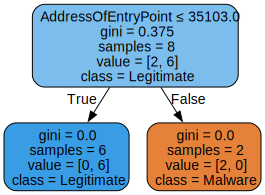

In [14]:
# Export the decision tree into DOT format
dot_data = tree.export_graphviz(tree_classifier,
                                out_file=None, 
                                feature_names=["AddressOfEntryPoint", "DllCharacteristics"],
                                class_names=["Malware", "Legitimate"],
                                filled=True,
                                rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)

graph

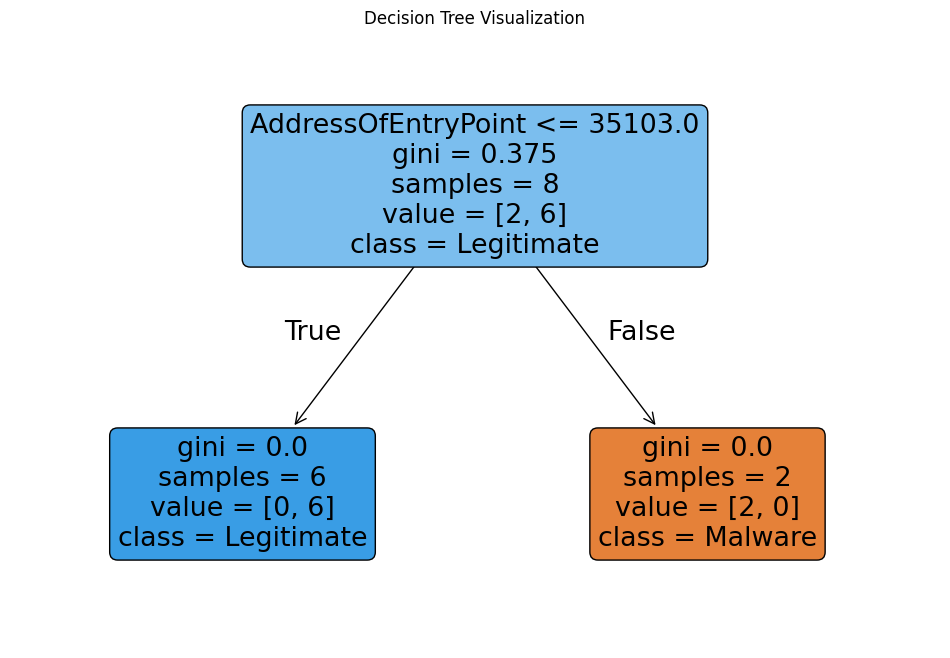

In [17]:
plt.figure(figsize=(12, 8))

tree.plot_tree(tree_classifier,
               feature_names=["AddressOfEntryPoint", "DllCharacteristics"],
               class_names=["Malware", "Legitimate"],
               filled=True,       
               rounded=True)       

plt.title("Decision Tree Visualization")
plt.show()

In [18]:
# Random Forest Classifier

rfc =  ensemble.RandomForestClassifier(n_estimators=50) 

In [19]:
rfc.fit(training_samples, training_targets)

RandomForestClassifier(n_estimators=50)

In [20]:
rfc_accuracy = rfc.score(testing_samples, testing_targets)
print("Random Forest Classifier accuracy: " + str(rfc_accuracy*100) )

Random Forest Classifier accuracy: 100.0


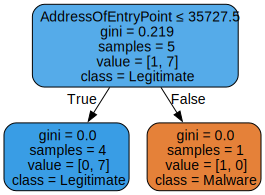

In [21]:
estimator = rfc.estimators_[0]

dot_data = tree.export_graphviz(
    estimator,
    out_file=None,  # Return DOT as a string
    feature_names=["AddressOfEntryPoint", "DllCharacteristics"],
    class_names=["Malware", "Legitimate"],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)

graph

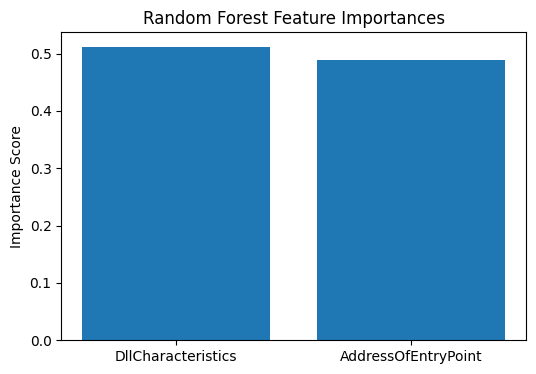

In [24]:
feature_names = ["AddressOfEntryPoint", "DllCharacteristics"]

importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(6, 4))
plt.title("Random Forest Feature Importances")
plt.bar(range(len(feature_names)), importances[indices], align="center")
plt.xticks(range(len(feature_names)), np.array(feature_names)[indices])
plt.ylabel("Importance Score")
plt.show()